In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from IPython.display import display, HTML
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib import cm, gridspec
import matplotlib.patches as patches
%matplotlib inline
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
from glob import glob
import cctk
from tqdm.notebook import tqdm

In [2]:
column_names = ["dist_CC", "dist_CO","dihedral1",
                "gas_phase_energy", "gas_phase_dipole", "gas_phase_oxygen_charge", "gas_phase_carbon_charge", "gas_rms_gradient",
                "dce_energy", "dce_dipole", "dce_oxygen_charge", "dce_carbon_charge",
                "water_energy", "water_dipole", "water_oxygen_charge", "water_carbon_charge"]
rows = []
for filename in tqdm(list(sorted(glob("b3lyp_juldz/*.out")))):
    files = cctk.GaussianFile.read_file(filename, extended_opt_info=True)
    if len(files) != 3:
        print(f"Skipped {filename}.")
        continue
    
    dist_CC = int(filename.split("-")[2][3:6])/100.0
    dist_CO = int(filename.split("-")[2][10:13])/100.0
    
    gas_phase_molecule = files[0].get_molecule()
    properties_dict = files[0].ensemble.get_properties_dict(gas_phase_molecule)
    dihedral1 = gas_phase_molecule.get_dihedral(12,14,15,16)
    gas_phase_energy = properties_dict["energy"]
    gas_phase_dipole = properties_dict["dipole_moment"]
    gas_phase_oxygen_charge = properties_dict["hirshfeld_charges"][14]
    gas_phase_carbon_charge = properties_dict["hirshfeld_charges"][12]
    gas_rms_gradient = properties_dict["rms_gradient"]
    
    dce_molecule = files[1].get_molecule()
    properties_dict = files[1].ensemble.get_properties_dict(dce_molecule)
    dce_energy = properties_dict["energy"]
    dce_dipole = properties_dict["dipole_moment"]
    dce_oxygen_charge = properties_dict["hirshfeld_charges"][14]
    dce_carbon_charge = properties_dict["hirshfeld_charges"][12]
    
    water_molecule = files[2].get_molecule()
    properties_dict = files[2].ensemble.get_properties_dict(water_molecule)
    water_energy = properties_dict["energy"]
    water_dipole = properties_dict["dipole_moment"]
    water_oxygen_charge = properties_dict["hirshfeld_charges"][14]
    water_carbon_charge = properties_dict["hirshfeld_charges"][12]  
    
    row = [dist_CC, dist_CO, dihedral1,
           gas_phase_energy, gas_phase_dipole, gas_phase_oxygen_charge, gas_phase_carbon_charge, gas_rms_gradient,
           dce_energy, dce_dipole, dce_oxygen_charge, dce_carbon_charge, 
           water_energy, water_dipole, water_oxygen_charge, water_carbon_charge ]
    rows.append(row)

  0%|          | 0/151 [00:00<?, ?it/s]

In [3]:
df = pd.DataFrame(rows, columns = column_names)
df["gas_phase_energy"] = 627.509474*(df["gas_phase_energy"]-df["gas_phase_energy"].min())
df["dce_energy"] = 627.509474*(df["dce_energy"]-df["dce_energy"].min())
df["water_energy"] = 627.509474*(df["water_energy"]-df["water_energy"].min())
df["gas_phase_carbonyl_polarization"] = df["gas_phase_carbon_charge"] - df["gas_phase_oxygen_charge"]
df["dce_carbonyl_polarization"] = df["dce_carbon_charge"] - df["dce_oxygen_charge"]
df["water_carbonyl_polarization"] = df["water_carbon_charge"] - df["water_oxygen_charge"]
df["gas_rms_gradient_log10"] = np.log10(df["gas_rms_gradient"])
df["gas_minus_water_energy"] = df["gas_phase_energy"] - df["water_energy"]
display(df.head())

,dist_CC,dist_CO,dihedral1,gas_phase_energy,gas_phase_dipole,gas_phase_oxygen_charge,gas_phase_carbon_charge,gas_rms_gradient,dce_energy,dce_dipole,...,dce_carbon_charge,water_energy,water_dipole,water_oxygen_charge,water_carbon_charge,gas_phase_carbonyl_polarization,dce_carbonyl_polarization,water_carbonyl_polarization,gas_rms_gradient_log10,gas_minus_water_energy
0,1.5,1.5,325.601131,8.050978,6.6981,-0.120143,0.109601,0.003337,8.021617,8.5757,...,0.110556,7.991208,8.9356,-0.120731,0.111191,0.229744,0.231931,0.231922,-2.476586,0.059770
1,1.5,1.6,323.482857,8.806512,7.0161,-0.133280,0.123607,0.003799,8.173888,9.0503,...,0.125397,8.023593,9.4416,-0.135009,0.126255,0.256887,0.260800,0.261264,-2.420354,0.782918
2,1.5,1.7,321.424892,11.692660,7.4066,-0.148567,0.138695,0.004721,10.450788,9.6536,...,0.141581,10.140026,10.0822,-0.151599,0.142700,0.287262,0.293300,0.294299,-2.325996,1.552634
3,1.5,1.8,319.450912,15.433131,7.8582,-0.165185,0.154152,0.005094,13.401306,10.3426,...,0.158320,12.947296,10.8242,-0.169722,0.159699,0.319337,0.327940,0.329421,-2.292952,2.485835
4,1.5,1.9,317.680882,19.325918,8.3560,-0.182411,0.169412,0.005116,16.319564,11.1103,...,0.174938,15.706192,11.6536,-0.188322,0.176597,0.351823,0.362954,0.364919,-2.291083,3.619726


In [4]:
df.gas_phase_energy.describe()

count    151.000000
mean      19.358939
std       10.164483
min        0.000000
25%       11.264689
50%       19.996437
75%       28.079261
max       39.699625
Name: gas_phase_energy, dtype: float64

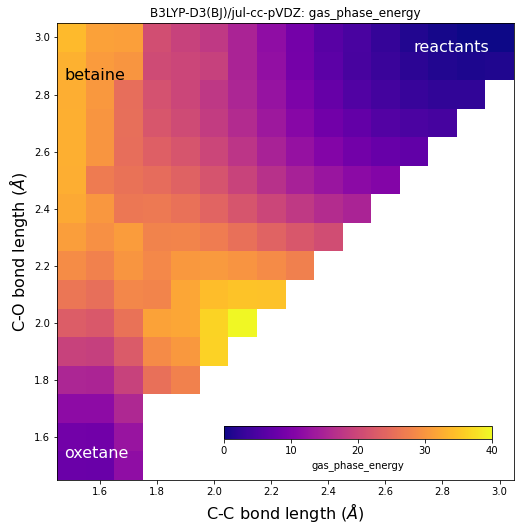

In [5]:
property_name = "gas_phase_energy"

fig1 = plt.figure(figsize=(12,12))
ax1 = fig1.add_subplot(111, aspect='equal')

min_value, max_value = 0.0, 40.0

norm = matplotlib.colors.Normalize(vmin=min_value, vmax=max_value)
m = cm.ScalarMappable(norm=norm, cmap=cm.plasma)

for index, row in df.iterrows():
    x,y,z = row.dist_CC, row.dist_CO, row[property_name]
    ax1.add_patch(
        patches.Rectangle(
            (x-0.05, y-0.05),        # (x,y)
            0.10,          # width
            0.10,          # height
            linewidth=0,
            color = m.to_rgba(z),
            zorder=1
        )
    )

m.set_array(df[property_name])
ticks = np.linspace(min_value,max_value,5)
cb = fig1.colorbar(m, shrink=0.40, use_gridspec=False, anchor=(0.68,2.8), orientation="horizontal",
     ticks=ticks, label=property_name)
cb.ax.tick_params(labelsize=10) 

ax1.set_title(f"B3LYP-D3(BJ)/jul-cc-pVDZ: {property_name}")
ax1.annotate("oxetane",(1.475,1.525),zorder=2,color='w',fontsize=16)
ax1.annotate("reactants",(2.70,2.95),zorder=2,color='w',fontsize=16)
ax1.annotate("betaine",(1.475,2.85),zorder=2,color='k',fontsize=16)

ax1.set_xlabel(r'C-C bond length ($\AA$)', fontsize=16)
ax1.set_ylabel(r'C-O bond length ($\AA$)', fontsize=16)
ax1.set_xlim(np.min(df.dist_CC)-0.05,np.max(df.dist_CC)+0.05)
ax1.set_ylim(np.min(df.dist_CO)-0.05,np.max(df.dist_CC)+0.05)
#ax1.tick_params(labelsize=12)

plt.show()

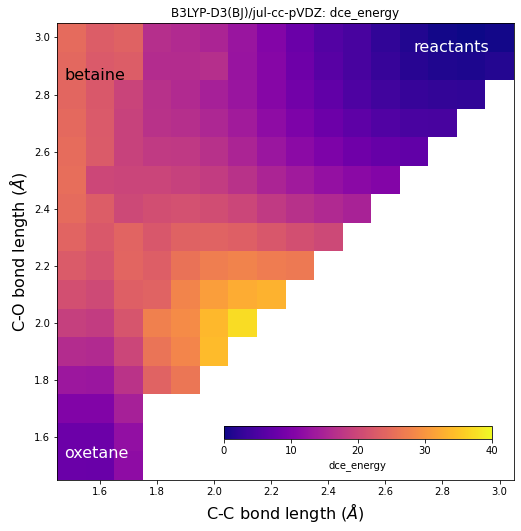

In [6]:
property_name = "dce_energy"

fig1 = plt.figure(figsize=(12,12))
ax1 = fig1.add_subplot(111, aspect='equal')

min_value, max_value = 0.0, 40.0

norm = matplotlib.colors.Normalize(vmin=min_value, vmax=max_value)
m = cm.ScalarMappable(norm=norm, cmap=cm.plasma)

for index, row in df.iterrows():
    x,y,z = row.dist_CC, row.dist_CO, row[property_name]
    ax1.add_patch(
        patches.Rectangle(
            (x-0.05, y-0.05),        # (x,y)
            0.10,          # width
            0.10,          # height
            linewidth=0,
            color = m.to_rgba(z),
            zorder=1
        )
    )

m.set_array(df[property_name])
ticks = np.linspace(min_value,max_value,5)
cb = fig1.colorbar(m, shrink=0.40, use_gridspec=False, anchor=(0.68,2.8), orientation="horizontal",
     ticks=ticks, label=property_name)
cb.ax.tick_params(labelsize=10) 

ax1.set_title(f"B3LYP-D3(BJ)/jul-cc-pVDZ: {property_name}")
ax1.annotate("oxetane",(1.475,1.525),zorder=2,color='w',fontsize=16)
ax1.annotate("reactants",(2.70,2.95),zorder=2,color='w',fontsize=16)
ax1.annotate("betaine",(1.475,2.85),zorder=2,color='k',fontsize=16)

ax1.set_xlabel(r'C-C bond length ($\AA$)', fontsize=16)
ax1.set_ylabel(r'C-O bond length ($\AA$)', fontsize=16)
ax1.set_xlim(np.min(df.dist_CC)-0.05,np.max(df.dist_CC)+0.05)
ax1.set_ylim(np.min(df.dist_CO)-0.05,np.max(df.dist_CC)+0.05)
#ax1.tick_params(labelsize=12)

plt.show()